In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
current_directory = os.getcwd() # get current directory
file_path = os.path.join(current_directory, '..', '..', 'results')

# loading files for each model
gemma_fine_tune = pd.read_csv(file_path + '/gemma_fine_tune.csv')
gemma_lora = pd.read_csv(file_path + '/gemma_lora.csv')
roberta_fine_tuning = pd.read_csv(file_path + '/roberta_fine_tuning.csv')
roberta_lora = pd.read_csv(file_path + '/roberta_lora.csv')

In [15]:
# read accuracies from csv files from the last epoch of training each model

gemma_fine_tune_acc = gemma_fine_tune['Accuracy'].iloc[-1] if 'Accuracy' in gemma_fine_tune.columns else None
gemma_lora_acc = gemma_lora['Accuracy'].iloc[-1] if 'Accuracy' in gemma_lora.columns else None
roberta_fine_tuning_acc = roberta_fine_tuning['Accuracy'].iloc[-1] if 'Accuracy' in roberta_fine_tuning.columns else None
roberta_lora_acc = roberta_lora['Accuracy'].iloc[-1] if 'Accuracy' in roberta_lora.columns else None


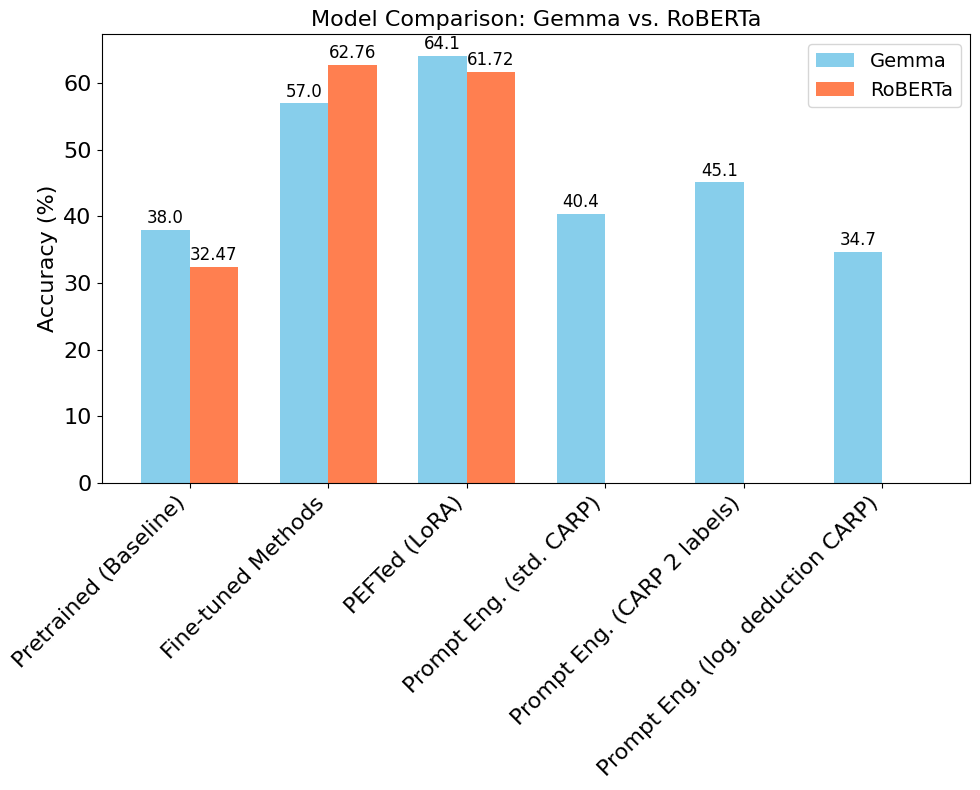

In [32]:
labels = ['Pretrained (Baseline)', 'Fine-tuned Methods', 'PEFTed (LoRA)', 
          'Prompt Eng. (std. CARP)', 'Prompt Eng. (CARP 2 labels)', 'Prompt Eng. (log. deduction CARP)']

gemma_accuracies = [38.0, gemma_fine_tune_acc*100, gemma_lora_acc*100, 40.4, 45.1, 34.7]
roberta_accuracies = [32.47, roberta_fine_tuning_acc*100, roberta_lora_acc*100, None, None, None]

width = 0.35
x = range(len(labels))
x_gemma = [pos - width / 2 for pos in x]
x_roberta = [pos + width / 2 for pos in x]

plt.figure(figsize=(10, 8))
plt.bar(x_gemma, gemma_accuracies, width=width, label='Gemma', color='skyblue')
plt.bar(x_roberta, [v if v is not None else 0 for v in roberta_accuracies], 
        width=width, label='RoBERTa', color='coral')

for i, v in enumerate(gemma_accuracies):       # accuracy values on top of each bar
    plt.text(x_gemma[i], v + 1, f"{v:.1f}", color='black', ha='center', fontsize=12)
for i, v in enumerate(roberta_accuracies):
    if v is not None:  # Only label non-None values
        plt.text(x_roberta[i], v + 1, f"{v:.2f}", color='black', ha='center', fontsize=12)

plt.xticks(x, labels, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Model Comparison: Gemma vs. RoBERTa', fontsize=16)
plt.legend(fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()
